<a href="https://colab.research.google.com/github/khee11/testrepository/blob/main/HW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 1 
tensorflow의 gradient tape 을 사용하여 아래 문제들을 풀어보세요

EX)
```
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
```

### Q1  $y = x^2 + 3x + 1$ 의 수식을  $x$ (a scalar variable) 에 대해 미분해보세요.

In [ ]:
import tensorflow as tf
x = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  y = tf.square(x) + 3*x + 1
gradient = tape.gradient(y, x)

print("x=",x.numpy(),"일 때 x에 대한 미분값은", gradient.numpy())

x= 3.0 일 때 x에 대한 미분값은 9.0


### Q2 $y = X^3 + 3X + 5$ 의 수식을  $X$ (a 2 by 2 matrix variable) 에 대해 미분해보세요.

In [ ]:
import tensorflow as tf
x = tf.Variable(initial_value=[(3.,2.),(1.,2.)])
with tf.GradientTape() as tape:
  y = tf.matmul(tf.matmul(x,x),x) + 3*x + 5
gradient = tape.gradient(y, x)

print("x = \n",x.numpy(),"일 때 \n X에 대한 미분값은 \n", gradient.numpy())

x = 
 [[3. 2.]
 [1. 2.]] 일 때 
 X에 대한 미분값은 
 [[60. 42.]
 [60. 42.]]


### Q3 $z = X^3 y^2 + 3X + 2yX + 1$ 의 수식을  $X$ (a 2 by 2 matrix variable)와 $y$ (a scalar variable) 에 대해 미분해보세요.

In [ ]:
import tensorflow as tf
x = tf.Variable(initial_value=[(3.,2.),(1.,2.)])
y = tf.Variable(initial_value=3.)

with tf.GradientTape() as tape:
  z = tf.matmul(tf.matmul(x,x),x)*tf.square(y) + 3*x + 2*x*y + 1
gradient_x = tape.gradient(z, x).numpy()

with tf.GradientTape() as tape:
  z = tf.matmul(tf.matmul(x,x),x)*tf.square(y) + 3*x + 2*x*y + 1
gradient_y = tape.gradient(z, y).numpy()

print("x = \n",x.numpy(),"일 때 \n X에 대한 미분값 : ", "\n", gradient_x, "\n", "y에 대한 미분값 : \n", gradient_y)

x = 
 [[3. 2.]
 [1. 2.]] 일 때 
 X에 대한 미분값 :  
 [[522. 360.]
 [522. 360.]] 
 y에 대한 미분값 : 
 784.0


### 아래 코드는 수업시간에 배운 예제 코드입니다. 코드를 참고하여 문제들을 풀어보세요.

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [3]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [4]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5154 - accuracy: 0.7893 - val_loss: 0.4077 - val_accuracy: 0.8521
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3104 - accuracy: 0.9021 - val_loss: 0.3296 - val_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2220 - accuracy: 0.9280 - val_loss: 0.2796 - val_accuracy: 0.8915
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1786 - accuracy: 0.9413 - val_loss: 0.2814 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1406 - accuracy: 0.9555 - val_loss: 0.2813 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1175 - accuracy: 0.9632 - val_loss: 0.2949 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0964 - accuracy: 0.9719 - val_loss: 0.3185 - val_accuracy: 0.8804
Epoch 8/20
30

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

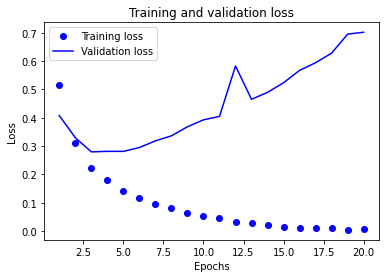

In [5]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [6]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4972 - accuracy: 0.8151
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2782 - accuracy: 0.9066
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2116 - accuracy: 0.9260
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2923 - accuracy: 0.8842


### Q4 모델에 hidden layer(dense layer)들을 늘려서 evaluation 결과를 확인해보세요. (2번째 트레이닝 때의 epoch 갯수는 상황에 맞게 조절해주세요.)

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Epoch 1/10
30/30 [==============================] - 4s 85ms/step - loss: 0.5332 - accuracy: 0.7732 - val_loss: 0.3874 - val_accuracy: 0.8718
Epoch 2/10
30/30 [==============================] - 1s 29ms/step - loss: 0.3020 - accuracy: 0.9007 - val_loss: 0.3154 - val_accuracy: 0.8736
Epoch 3/10
30/30 [==============================] - 1s 43ms/step - loss: 0.2184 - accuracy: 0.9257 - val_loss: 0.2771 - val_accuracy: 0.8898
Epoch 4/10
30/30 [==============================] - 1s 33ms/step - loss: 0.1630 - accuracy: 0.9454 - val_loss: 0.2899 - val_accuracy: 0.8855
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1344 - accuracy: 0.9526 - val_loss: 0.3142 - val_accuracy: 0.8796
Epoch 6/10
30/30 [==============================] - 1s 33ms/step - loss: 0.1012 - accuracy: 0.9693 - val_loss: 0.3317 - val_accuracy: 0.8798
Epoch 7/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0893 - accuracy: 0.9719 - val_loss: 0.3334 - val_accuracy: 0.8841
Epoch 8/10
30

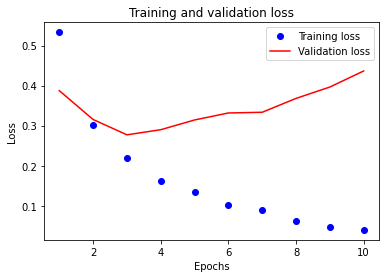

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
history_dict = history2.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", color="red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
# epoch=3일 때 val_loss가 가장 작음

model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model2.fit(x_train, y_train, epochs=3, batch_size=512)
results2 = model2.evaluate(x_test, y_test)
print(results2, "\n loss diff = ", round(results2[0] - results[0], 4), 
      "accuracy diff = ", round(results2[1]-results[1],4))

Epoch 1/3
49/49 [==============================] - 1s 13ms/step - loss: 0.4389 - accuracy: 0.8246
Epoch 2/3
49/49 [==============================] - 1s 14ms/step - loss: 0.2453 - accuracy: 0.9146
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.2872 - accuracy: 0.8853
[0.287153035402298, 0.8852800130844116] 
 loss diff =  -0.0366 accuracy diff =  0.0124


### Q5 Dense layer 들의 output 차원을 16에서 32이로 증가시켜본 후 evaluation 결과를 확인해보세요. (2번째 트레이닝 때의 epoch 갯수는 상황에 맞게 조절해주세요.)

Epoch 1/10
30/30 [==============================] - 2s 54ms/step - loss: 0.4854 - accuracy: 0.7911 - val_loss: 0.3633 - val_accuracy: 0.8606
Epoch 2/10
30/30 [==============================] - 1s 25ms/step - loss: 0.2740 - accuracy: 0.9025 - val_loss: 0.2863 - val_accuracy: 0.8899
Epoch 3/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1946 - accuracy: 0.9329 - val_loss: 0.2755 - val_accuracy: 0.8899
Epoch 4/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1554 - accuracy: 0.9451 - val_loss: 0.2841 - val_accuracy: 0.8871
Epoch 5/10
30/30 [==============================] - 1s 22ms/step - loss: 0.1243 - accuracy: 0.9574 - val_loss: 0.3016 - val_accuracy: 0.8837
Epoch 6/10
30/30 [==============================] - 1s 21ms/step - loss: 0.0947 - accuracy: 0.9707 - val_loss: 0.3226 - val_accuracy: 0.8826
Epoch 7/10
30/30 [==============================] - 1s 21ms/step - loss: 0.0770 - accuracy: 0.9764 - val_loss: 0.4569 - val_accuracy: 0.8503
Epoch 8/10
30

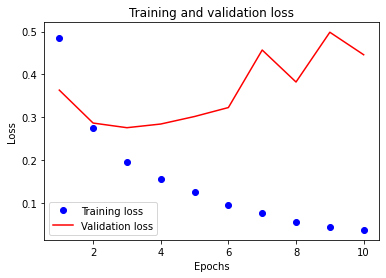

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model3 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
history_dict = history3.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", color="red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
# epoch=3일 때 val_loss가 가장 작음

model3 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model3.fit(x_train, y_train, epochs=3, batch_size=512)
results3 = model3.evaluate(x_test, y_test)
print(results3, "\n loss diff = ", round(results3[0] - results[0], 4), 
      "accuracy diff = ", round(results3[1]-results[1],4))

Epoch 1/3
49/49 [==============================] - 2s 17ms/step - loss: 0.4321 - accuracy: 0.8152
Epoch 2/3
49/49 [==============================] - 1s 17ms/step - loss: 0.2424 - accuracy: 0.9110
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.3147 - accuracy: 0.8742
[0.3147381544113159, 0.8741999864578247] 
 loss diff =  -0.009 accuracy diff =  0.0013


### Q6 모형을 조금씩 바꿔보면서 성능을 확인해보고, 좋아 보이는 모형하나를 제안해주세요. 

Epoch 1/10
30/30 [==============================] - 3s 45ms/step - loss: 0.5178 - accuracy: 0.7509 - val_loss: 0.3427 - val_accuracy: 0.8740
Epoch 2/10
30/30 [==============================] - 1s 21ms/step - loss: 0.2861 - accuracy: 0.8938 - val_loss: 0.3177 - val_accuracy: 0.8727
Epoch 3/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1994 - accuracy: 0.9289 - val_loss: 0.2937 - val_accuracy: 0.8841
Epoch 4/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1579 - accuracy: 0.9444 - val_loss: 0.3786 - val_accuracy: 0.8585
Epoch 5/10
30/30 [==============================] - 1s 22ms/step - loss: 0.1270 - accuracy: 0.9571 - val_loss: 0.3175 - val_accuracy: 0.8841
Epoch 6/10
30/30 [==============================] - 1s 25ms/step - loss: 0.0984 - accuracy: 0.9669 - val_loss: 0.4174 - val_accuracy: 0.8589
Epoch 7/10
30/30 [==============================] - 1s 22ms/step - loss: 0.0762 - accuracy: 0.9762 - val_loss: 0.3655 - val_accuracy: 0.8819
Epoch 8/10
30

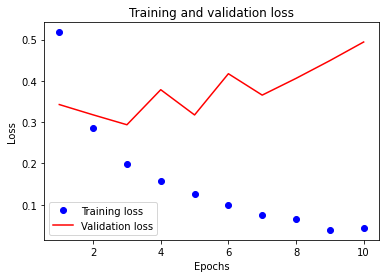

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model4 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"), 
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
history_dict = history4.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", color="red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [16]:
# epoch=3일 때 val_loss가 가장 작음

model4 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),    
    layers.Dense(1, activation="sigmoid")
])

model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model4.fit(x_train, y_train, epochs=3, batch_size=512)
results4 = model4.evaluate(x_test, y_test)
print(results4, "\n loss diff = ", round(results4[0] - results[0], 4), 
      "accuracy diff = ", round(results4[1]-results[1],4))

Epoch 1/3
49/49 [==============================] - 1s 13ms/step - loss: 0.4241 - accuracy: 0.8288
Epoch 2/3
49/49 [==============================] - 1s 13ms/step - loss: 0.2466 - accuracy: 0.9091
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.3047 - accuracy: 0.8792
[0.30472248792648315, 0.8791599869728088] 
 loss diff =  0.0124 accuracy diff =  -0.0051
